# Machine Learning-Based Risk Assessment for Air Pressure System Failures in Automative Vechile Industry


In [1]:
# Importing Libraries

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler 

## Importing dataset

In [49]:
data = pd.read_csv("Dataset.csv")
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,0,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,0,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,0,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,0,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.640625,0.007812,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.476562,0.656250,0.718750,0.734375,0.640625,0.218750,0.992188,0.421875,-0.023438,-0.023438
59996,0,-0.390625,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.375000,-0.375000,-0.359375,-0.289062,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59997,0,-0.406250,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59998,0,0.140625,0.304688,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.218750,0.023438,-0.085938,-0.148438,-0.132812,-0.101562,0.992188,0.992188,-0.023438,-0.023438


In [50]:
# checking the null values

In [51]:
data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

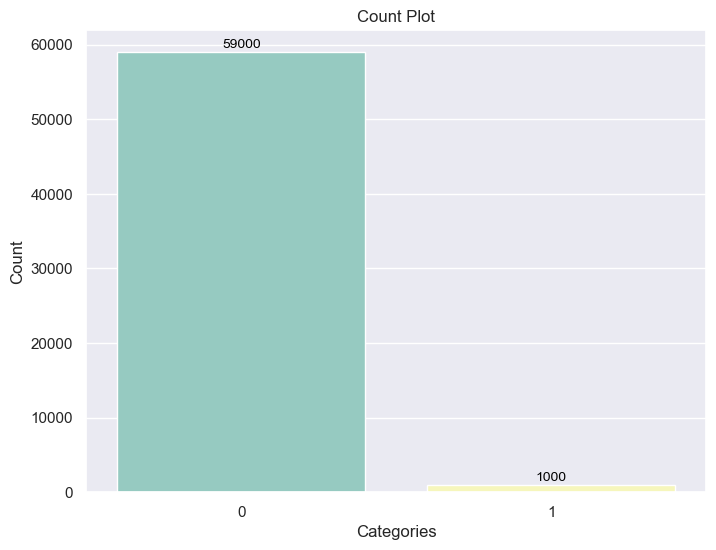

In [52]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x='class', data=data, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [53]:
# Defining Dependent and independent variables

In [54]:
X= data.iloc[:, 1:]
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.640625,0.007812,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,...,0.476562,0.656250,0.718750,0.734375,0.640625,0.218750,0.992188,0.421875,-0.023438,-0.023438
59996,-0.390625,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.375000,-0.375000,-0.359375,-0.289062,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59997,-0.406250,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
59998,0.140625,0.304688,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,...,0.218750,0.023438,-0.085938,-0.148438,-0.132812,-0.101562,0.992188,0.992188,-0.023438,-0.023438


In [55]:
y= data.iloc[:, 0]
y

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64

In [56]:
from imblearn.under_sampling import RandomUnderSampler

In [57]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the undersampling
X, y = rus.fit_resample(X, y)


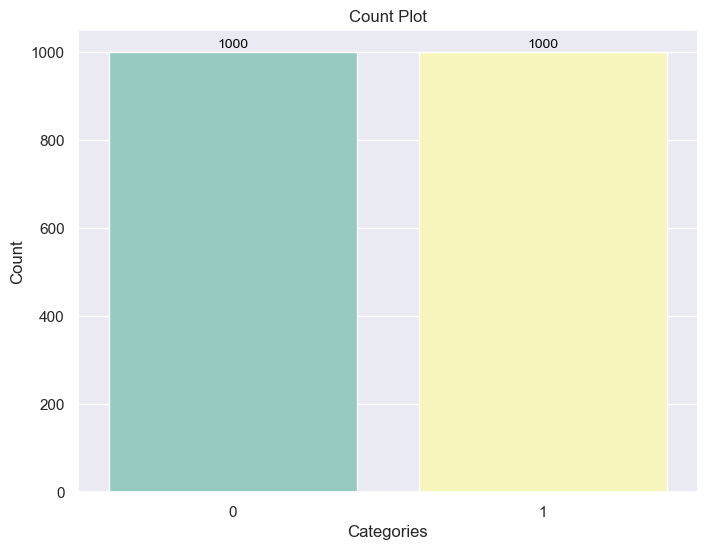

In [58]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x=y, data=data, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
#Standard scalars

In [61]:
scaler = StandardScaler()

In [62]:
# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

In [63]:
X_train.shape

(1600, 170)

In [64]:
X_test.shape

(400, 170)

In [65]:
labels = ['Fault','NOFault' ]

In [66]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [67]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# DecisionTreeClassifier

DecisionTreeClassifier Accuracy    : 92.75
DecisionTreeClassifier Precision   : 92.75177517751776
DecisionTreeClassifier Recall      : 92.74856871421787
DecisionTreeClassifier FSCORE      : 92.74959216455926

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

       Fault       0.92      0.93      0.93       198
     NOFault       0.93      0.93      0.93       202

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



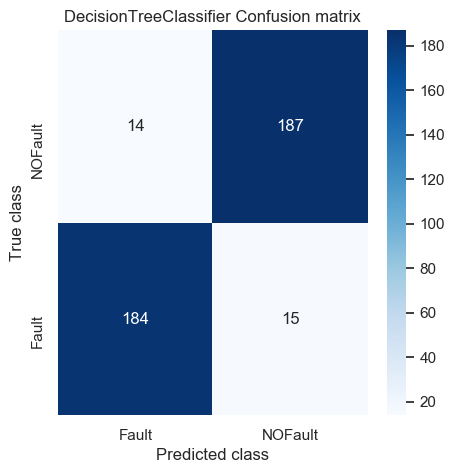

In [68]:
# Check if the pkl file exists
if os.path.exists('Dt_classifier_weights.pkl'):
    # Load the model from the pkl file
    dt_classifier= joblib.load('Dt_classifier_weights.pkl')
    predict = dt_classifier.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)
else:
    dt_classifier = DecisionTreeClassifier()
    # Train the classifier on the training data
    dt_classifier.fit(X_train, y_train)
    # Make predictions on the test data
    predict=dt_classifier.predict(X_test)
    joblib.dump(dt_classifier, 'dt_classifier_weights.pkl')
    print("dt_classifier_model trained and model weights saved.")
    calculateMetrics("DecisionTreeClassifier", predict, y_test)

# Knearest Neighbours Classifier

KNN Classifier Accuracy    : 94.5
KNN Classifier Precision   : 94.53408380237649
KNN Classifier Recall      : 94.5073626840671
KNN Classifier FSCORE      : 94.49944994499451

 KNN Classifier classification report
               precision    recall  f1-score   support

       Fault       0.96      0.93      0.95       205
     NOFault       0.93      0.96      0.94       195

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.95       400



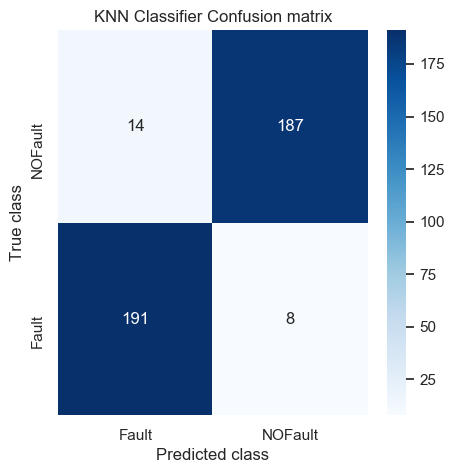

In [69]:
# Check if the pkl file exists
if os.path.exists('KNN_weights.pkl'):
    # Load the model from the pkl file
    classifier= joblib.load('KNN_weights.pkl')
    predict = classifier.predict(X_test)
    calculateMetrics("KNN Classifier", predict, y_test)
else:
    classifier = KNeighborsClassifier(n_neighbors=20)
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)
    # Make predictions on the test data
    predict=classifier.predict(X_test)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'KNN_weights.pkl')
    print("KNN classifier_model trained and model weights saved.")
    calculateMetrics("KNeighborsClassifier", predict, y_test)

In [70]:
#Performance Comparision of both the algorithmns

In [71]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = [ "DecisionTreeClassifier","KNeighborsClassifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,DecisionTreeClassifier,92.751775,92.748569,92.749592,92.75
1,KNeighborsClassifier,94.534084,94.507363,94.499450,94.50


In [72]:
# Prediction on new test data 

In [73]:
test=pd.read_csv("test.csv")

In [74]:
test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
5,-0.140625,0.234375,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.046875,0.140625,0.390625,-0.078125,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
6,0.640625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.101562,...,-0.273438,-0.335938,-0.351562,-0.328125,-0.281250,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
7,0.992188,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,0.304688,...,0.992188,0.992188,0.992188,0.992188,0.765625,0.109375,0.789062,-0.031250,-0.023438,-0.023438
8,0.085938,0.351562,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.023438,0.992188,0.992188,...,0.851562,0.296875,0.070312,-0.031250,0.000000,-0.039062,-0.296875,-0.171875,-0.023438,-0.023438
9,0.992188,-0.015625,-0.468750,-0.007812,-0.046875,-0.054688,0.023438,0.992188,0.992188,0.992188,...,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,-0.195312,-0.171875,-0.023438,-0.023438


In [75]:
scaled_test=scaler.fit_transform(test)

In [76]:
# Make predictions on the selected test data
predict = classifier.predict(scaled_test)
# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    print(test.iloc[i])  # Print the row
    print(f"Row {i}:************************************************** {labels[p]}")

aa_000    0.117188
ab_000   -0.289062
ac_000    0.992188
ad_000   -0.007812
ae_000   -0.046875
            ...   
ee_007   -0.109375
ee_008   -0.140625
ee_009   -0.171875
ef_000   -0.023438
eg_000   -0.023438
Name: 0, Length: 170, dtype: float64
Row 0:************************************************** Fault
aa_000   -0.179688
ab_000   -0.289062
ac_000   -0.468750
ad_000   -0.007812
ae_000   -0.046875
            ...   
ee_007   -0.148438
ee_008   -0.085938
ee_009   -0.140625
ef_000   -0.023438
eg_000   -0.023438
Name: 1, Length: 170, dtype: float64
Row 1:************************************************** Fault
aa_000   -0.125000
ab_000   -0.289062
ac_000   -0.468750
ad_000   -0.007812
ae_000   -0.046875
            ...   
ee_007   -0.109375
ee_008   -0.093750
ee_009   -0.164062
ef_000   -0.023438
eg_000   -0.023438
Name: 2, Length: 170, dtype: float64
Row 2:************************************************** Fault
aa_000   -0.406250
ab_000   -0.289062
ac_000   -0.468750
ad_000   -0.0078

In [77]:
test['predict']=predict

In [78]:
test['Predicted'] = [labels[p] for p in predict]

In [79]:
test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,predict,Predicted
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438,0,Fault
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438,0,Fault
2,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438,0,Fault
3,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188,0,Fault
4,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438,0,Fault
5,-0.140625,0.234375,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.117188,...,0.390625,-0.078125,-0.304688,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438,0,Fault
6,0.640625,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,-0.101562,...,-0.351562,-0.328125,-0.281250,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438,0,Fault
7,0.992188,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,0.304688,...,0.992188,0.992188,0.765625,0.109375,0.789062,-0.031250,-0.023438,-0.023438,1,NOFault
8,0.085938,0.351562,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.023438,0.992188,0.992188,...,0.070312,-0.031250,0.000000,-0.039062,-0.296875,-0.171875,-0.023438,-0.023438,1,NOFault
9,0.992188,-0.015625,-0.468750,-0.007812,-0.046875,-0.054688,0.023438,0.992188,0.992188,0.992188,...,0.992188,0.992188,0.992188,0.992188,-0.195312,-0.171875,-0.023438,-0.023438,1,NOFault
